<a href="https://colab.research.google.com/github/nunososorio/SingleCellGenomics2024/blob/main/3_Wednesday_April10th/SessionIV_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# April 10th, Wednesday
## Practical Session IV - Part 3


## 0. Setup the environment and load your data

In [21]:
# Install scanpy and loompy if you don't have them already or if you are running on colab
# In this notebook we will use the Louvain and Leiden clustering algorithms; you will need the corresponding packages
! pip install scanpy loompy louvain leidenalg > _

In [2]:
# Load the libraries we will use
import numpy as np
import pandas as pd
import scanpy as sc
import loompy
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/usr/local/lib/python3.10/dist-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/usr/local/lib/python3.10/dist-packages/loompy/bus_file.py:1

In [3]:
# Adjust the output for the figures
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, facecolor='white')
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['font.size'] = 16
sc.logging.print_header()

scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.25.2 scipy==1.11.4 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.14.1 pynndescent==0.5.11


In [47]:
adata = sc.read_h5ad("Data1_DimRed.h5ad") # enter loom/h5ad file name here
#adata = sc.read_loom("Data1_DimRed.loom", var_names='var_names', obs_names='obs_names')


In [15]:
# If you used .loom format, you have to rerun the neighbors calculation
#sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40) # specify the number of neighbors and number of PCs you wish to use

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)


## 6. Clustering

Clustering the data helps to identify cells with similar gene expression properties that may belong to the same cell type or cell state. There are two popular clustering methods, both available in scanpy: Louvain and Leiden clustering.

### **Exercise 1**:

Run both the Louvain and Leiden clustering algorithms. Visualize both sets of clusters on your UMAP representation. Are the clusters different from each method? Visualize the clusters again, this time on the tSNE embedding instead of the UMAP embedding. Are there differences in which clusters are grouped together?

In [19]:
# your code here
sc.tl.louvain(adata, resolution=0.2)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 11 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [22]:
# your code here
sc.tl.leiden(adata, resolution=0.2)

running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


Next, you can visualize your UMAP and tSNE representations of the scRNA-seq and color by various metadata attributes (including Louvian or Leiden clusters) from the prior steps. For example:

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


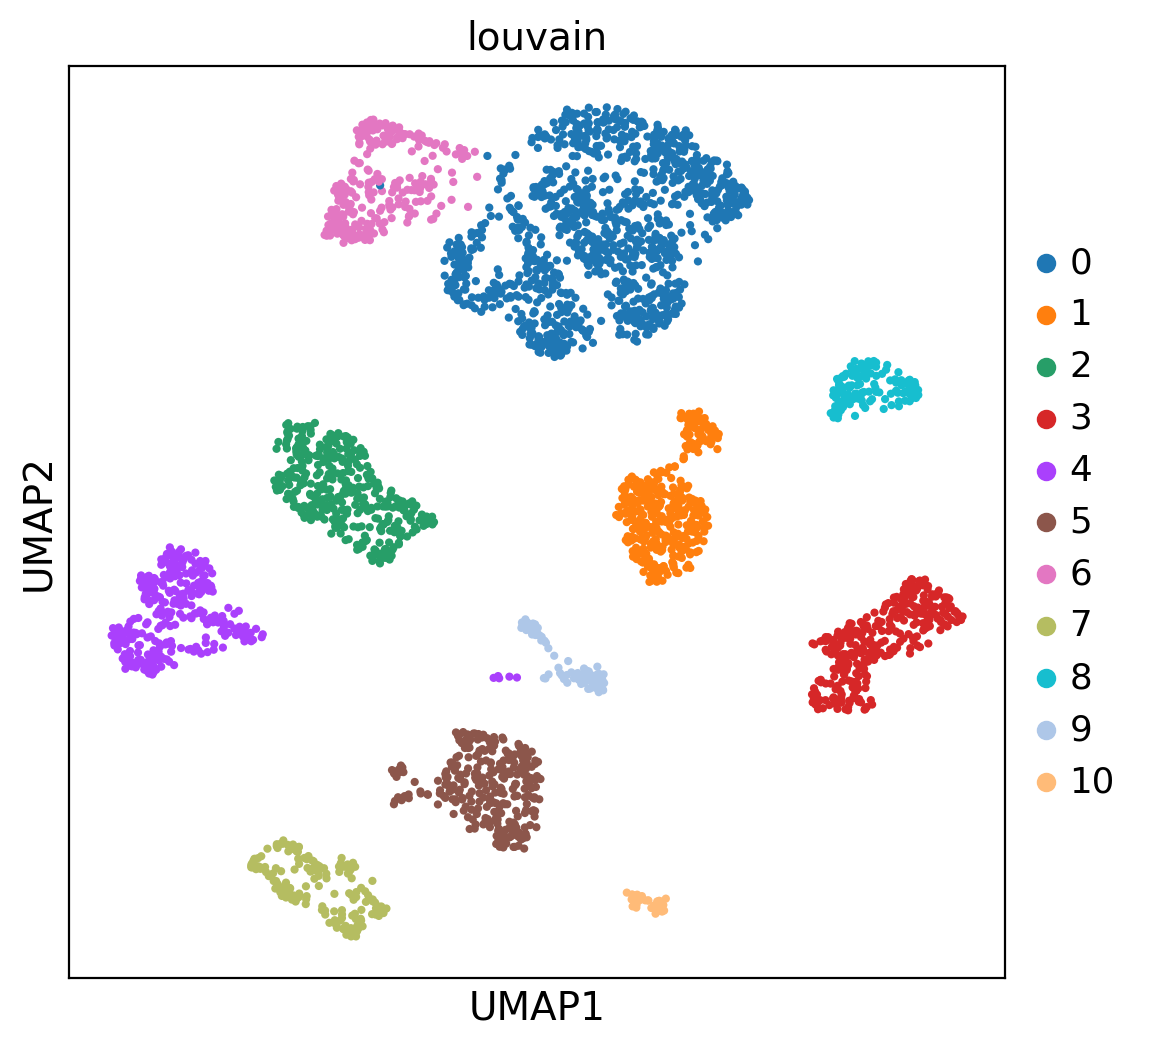

In [25]:
sc.pl.umap(adata, use_raw=False, color='louvain', wspace=0.3, ncols=2) # color by louvain and leiden

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


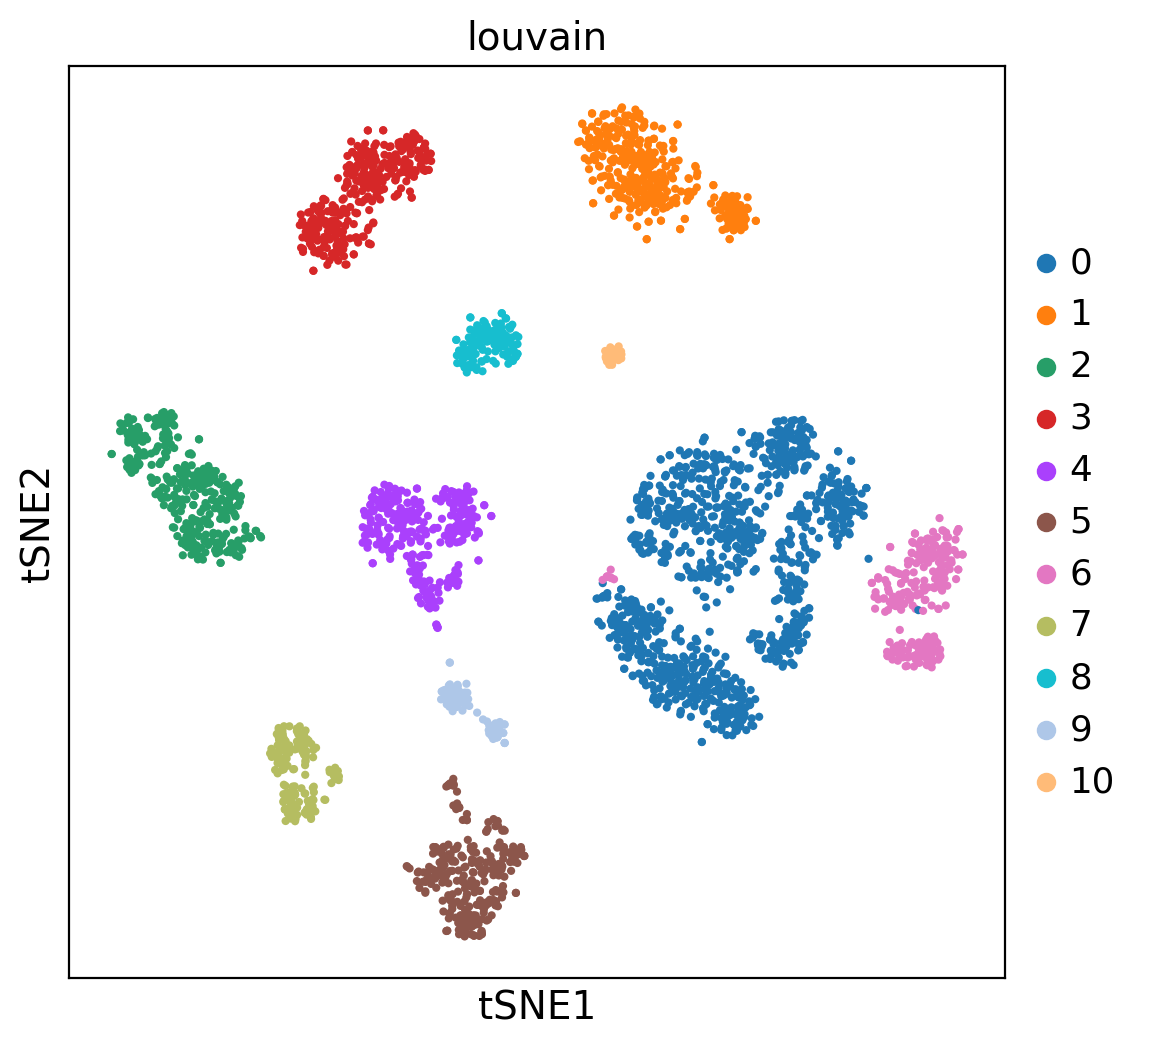

In [27]:
sc.pl.tsne(adata, use_raw=False, color='louvain', wspace=0.3, ncols=2) # color by louvain and leiden

### **Exercise 2**:

How many cells do you have per cluster? Assess this using the value_counts() function from pandas.

Hint: remember that adata.obs is just a pandas data frame!

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

In [31]:
# your code here
adata.obs.louvain.value_counts()

0     1106
1      372
2      356
3      322
4      322
5      292
6      250
7      167
8      130
9       87
10      37
Name: louvain, dtype: int64

### **Exercise 3**:

Visualize some of the other metadata on the UMAP or tSNE embedding, including the n_counts, n_genes, percent_mito, and phase metadata found in adata.obs. Do any clusters seem to have an obvious bias towards particular attributes?

This might be a sign that we want to optimize prior steps of the analysis, such as adjusting the number of principal components used in the neighborhood smoothing or regressing out particular variables. As with a pandas dataframe, you can also examine the frequency of various attributes using a command such as: adata.obs["phase"].value_counts().


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


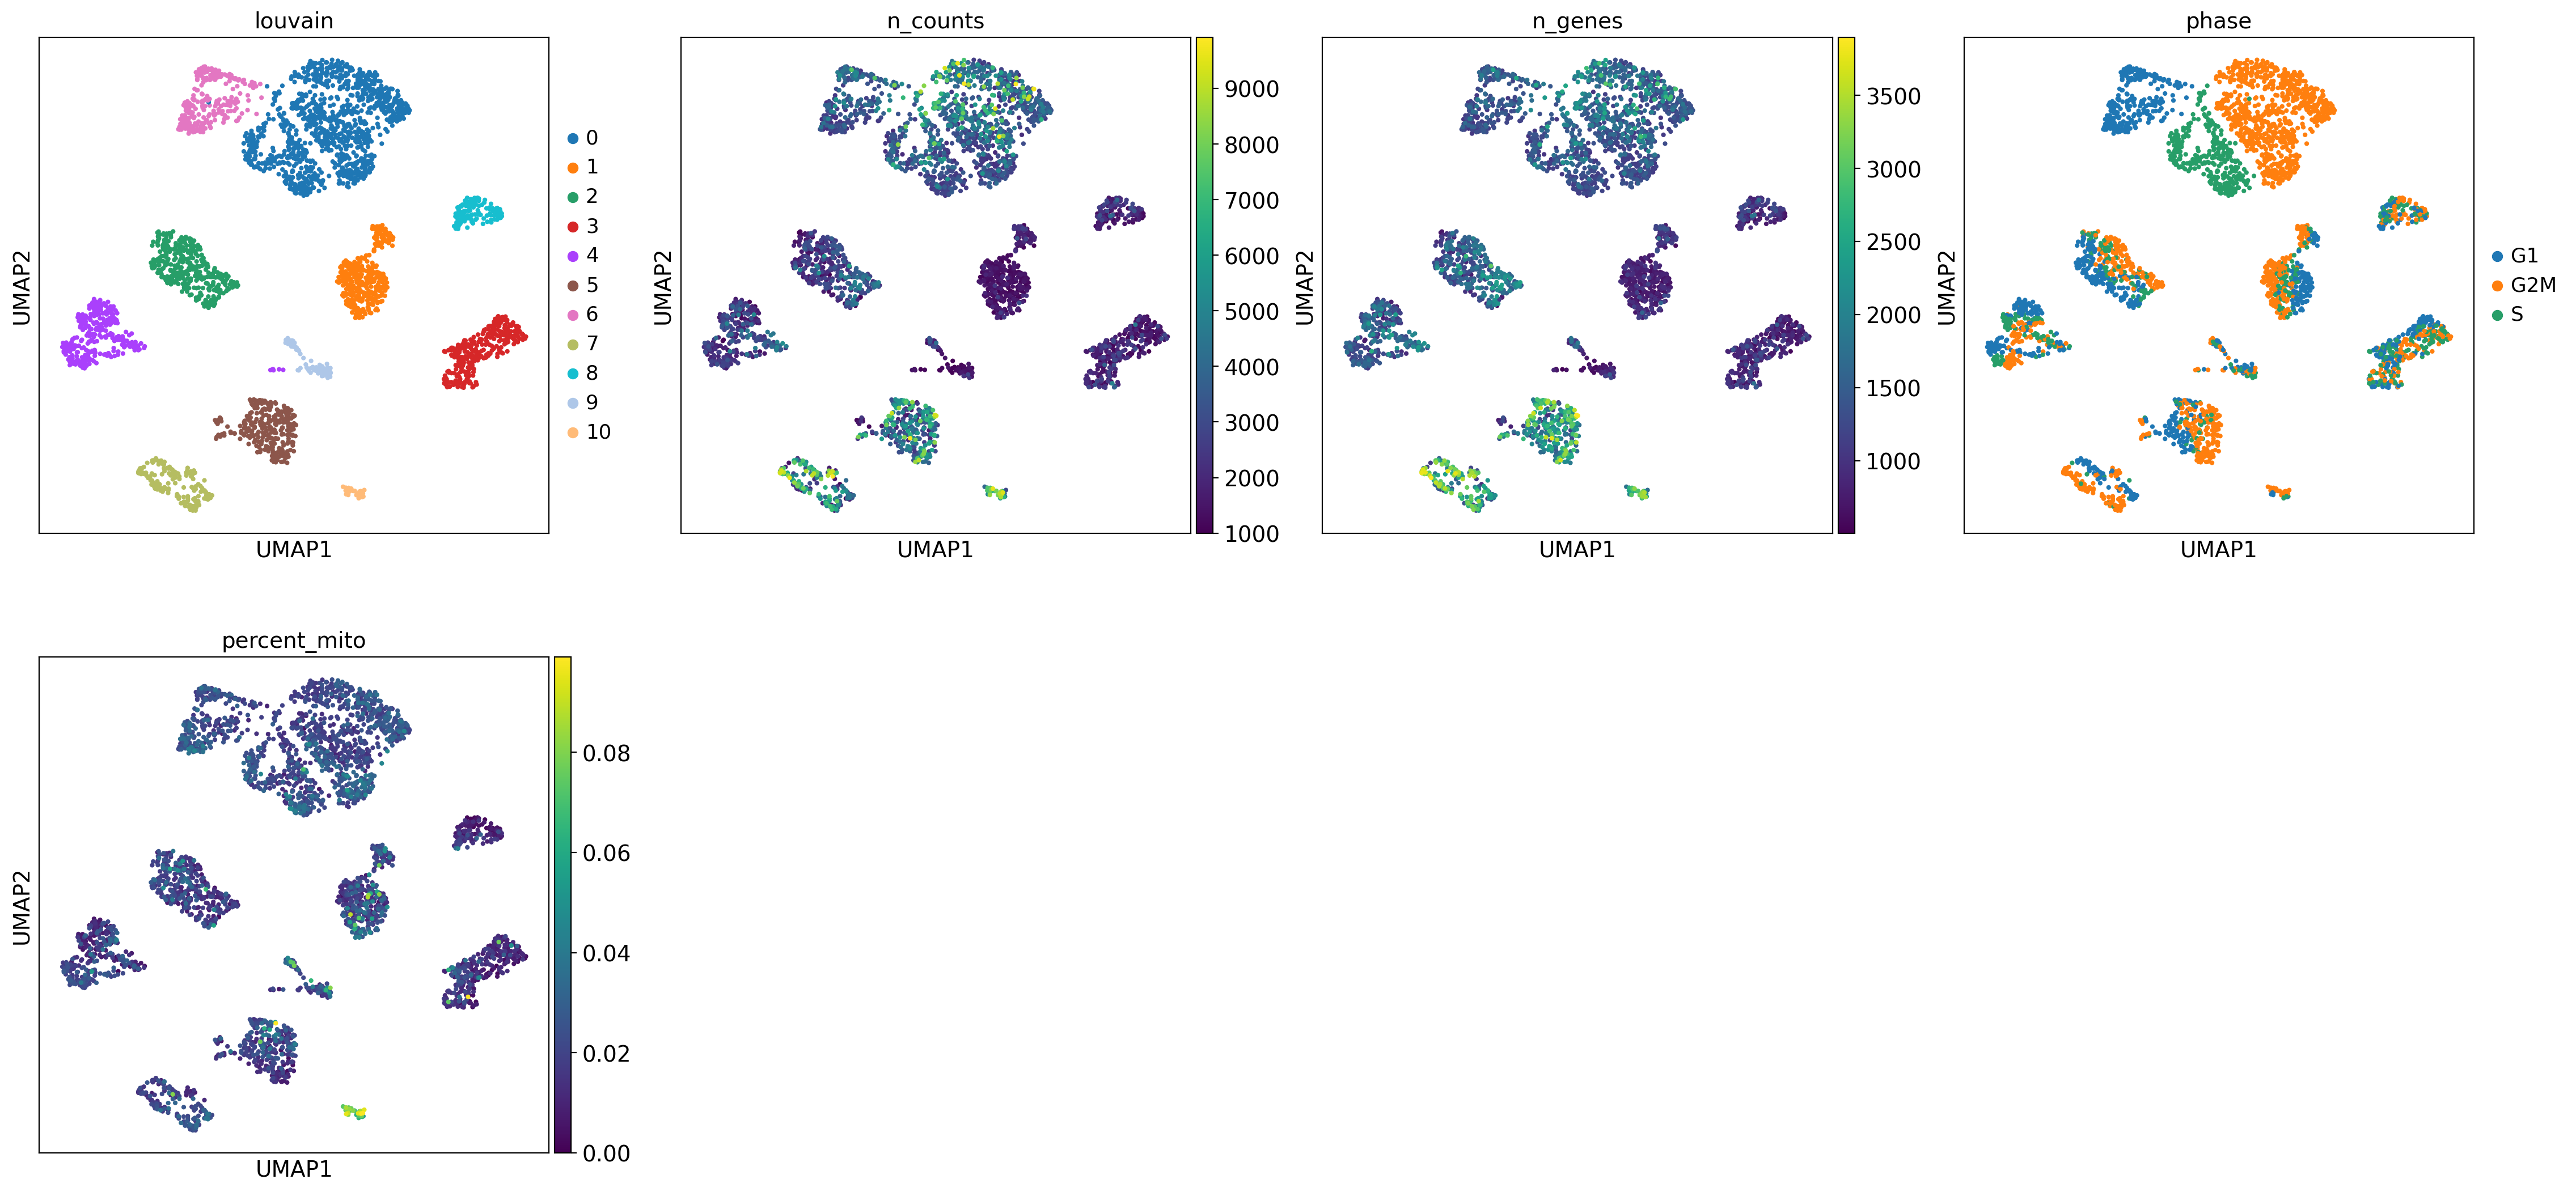

In [32]:
# your code here
sc.pl.umap(adata, color=['louvain','n_counts','n_genes','phase','percent_mito'])

### **Exercise 4**:

Let’s proceed with Louvain clustering and UMAP embeddings for the time being.
- Create a new metadata attribute for your current clusters, i.e. adata.obs["louvain_res1"] = adata.obs["louvain"].
- Repeat louvain clustering using different values for the resolution parameter: 0.5 and 1.5.
- Save the clusters in a new metadata column and visualize them on the UMAP representation.
- How does the number of clusters change with adjustments to the resolution parameter? Using the resolution=1 as a basis, do any clusters divide into two smaller clusters upon changing the resolution parameter? Do any clusters merge together?

In [34]:
adata.obs["louvain_res1"] = adata.obs["louvain"].copy()

sc.tl.louvain(adata, resolution=0.5) # you must complete
adata.obs["louvain_res0.5"] = adata.obs["louvain"].copy()

# repeat for louvain resolution1.5

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


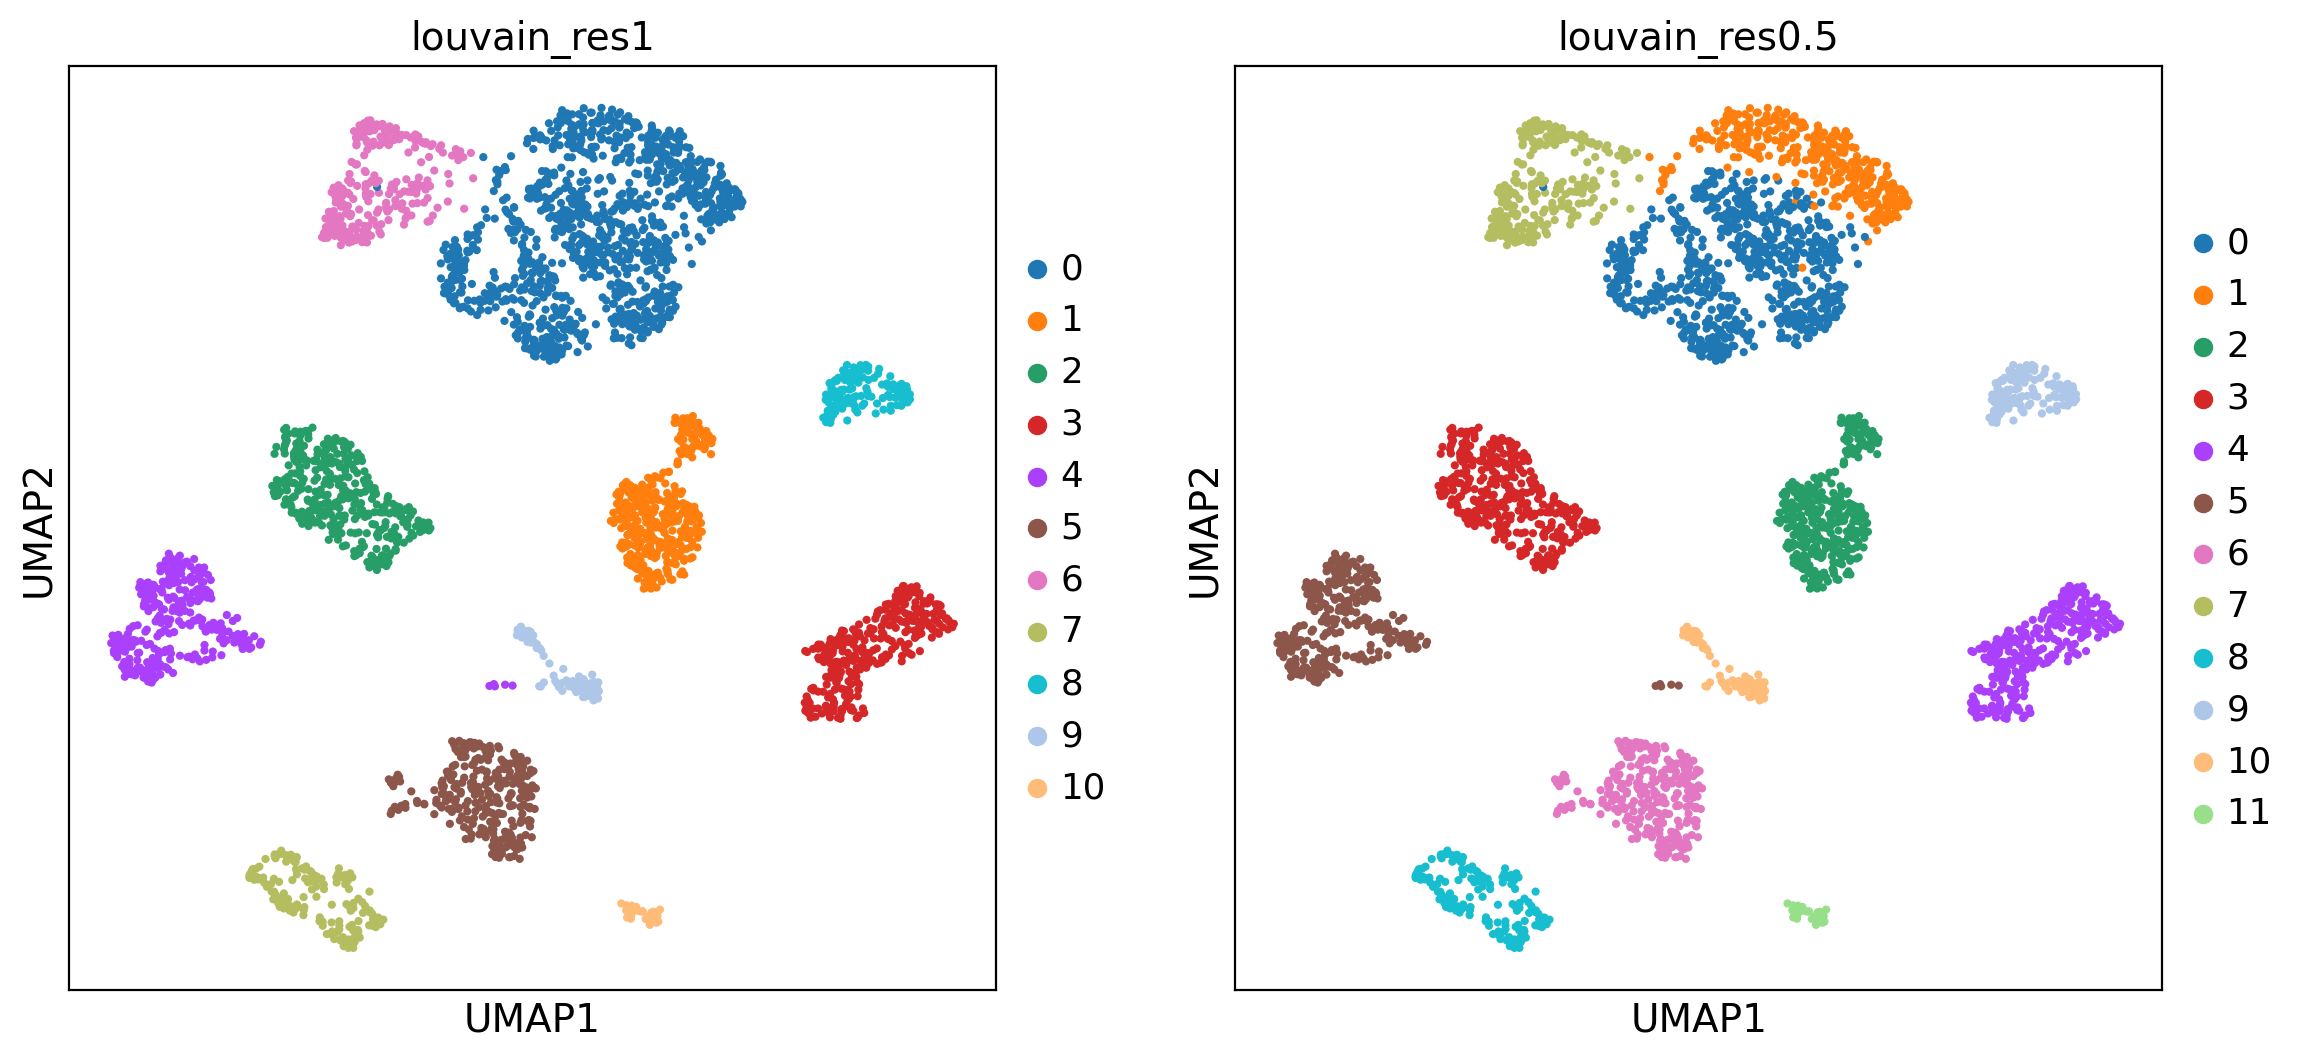

In [35]:
# visualize the umap colored by the different resolution clustering. What changes?
# your code here
sc.pl.umap(adata, color=['louvain_res1','louvain_res0.5'])

### **Exercise 5**:

Let’s take a few steps back to understand the previous steps a little bit better! For example, the number of principal components used in computing the neighborhood graph will greatly impact the visualizations.

Rerun previous code using the following number of PCs and visualize the different UMAPs and number of clusters: 4 PCs, 8 PCs, 15 PCs, 30 PCs. What changes with the different number of PCs used?

Choose an “optimal” number of PCs by examining the contribution of each PC to the total variance with the command: sc.pl.pca_variance_ratio(adata, log=True).

In [ ]:
# Apply for 4 PCs
sc.pp.neighbors # you must complete
sc.tl.umap # you must complete
sc.tl.louvain # you must complete
sc.pl.umap(adata, color=["louvain"])

In [ ]:
# Apply for 8 PCs

In [ ]:
# Apply for 15 PCs

In [ ]:
# Apply for 30 PCs

## 7. Identifying marker genes and cell types

Let’s use a simple method implemented by scanpy to find marker genes by the Louvain cluster.

In [37]:
sc.tl.rank_genes_groups(adata, groupby='louvain') # read the function description to complete this function

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: 

In [39]:
marker_genes = pd.DataFrame(adata.uns["rank_genes_groups"]["names"])

In [45]:
marker_genes.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,Plp1,Plp1,Atp1a2,Arpp21,Cst3,Snca,Snhg11,Plp1,Atp1b1,Apoe,Cox8a,mt-Atp6
1,Cryab,Scd2,Apoe,Meg3,Hexb,Ppp3ca,Meg3,Cnp,Meg3,Ftl1,Ndufa4,mt-Co2
2,Mobp,Cldn11,Slc6a11,Pcp4,Ctss,Rpl3,Ttc3,Mobp,Ndrg4,C1qc,Meg3,mt-Co3
3,Cnp,Ugt8a,Mt1,Ppp1r1b,C1qa,Olfm1,Sncb,Mbp,Ntng1,C1qa,H3f3b,mt-Co1
4,Mal,Qk,Sparcl1,Calm2,Ctsd,Calm1,Rtn1,Cldn11,Syp,Pf4,Selm,Tppp3
5,Mog,Cnp,Aldoc,Ppp3ca,C1qb,Cplx2,Dynll2,Mal,Ywhag,Lyz2,Snrpn,Rpl39
6,Mbp,Mbp,Cst3,Pde10a,C1qc,Pcp4,Nap1l5,Fth1,Tcf7l2,Fcer1g,Malat1,Rpl35a
7,Fth1,Mobp,Atp1b2,Chchd10,Tyrobp,Rps2,Tmsb10,Cryab,Thy1,C1qb,Snap25,S100a6
8,Cldn11,Fth1,Gpr37l1,Pcp4l1,Lgmn,Bex2,Snrpn,Mog,Stmn2,Sepp1,Uqcrq,Atp5l
9,Tubb4a,Mal,Slc1a2,Tmem158,Itm2b,Ppp1r1a,Pcsk1n,Tubb4a,Map1b,Tmsb4x,Cox6c,Rpl22l1


In [43]:
adata.obs.louvain.value_counts()

0     733
1     373
2     372
3     356
4     322
5     322
6     292
7     250
8     167
9     130
10     87
11     37
Name: louvain, dtype: int64

### **Exercise 6**:

Visualize marker genes on the UMAP or tSNE representation. Try to find 3-4 marker genes that are indeed specific to a particular cluster. Are there any clusters that do not seem to have unique marker genes?

Are there any clusters containing markers that are only specific to a portion of the cluster?

Marker genes should uniformly define cells "everywhere" in a cluster in UMAP space, otherwise the cluster might actually be two!

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


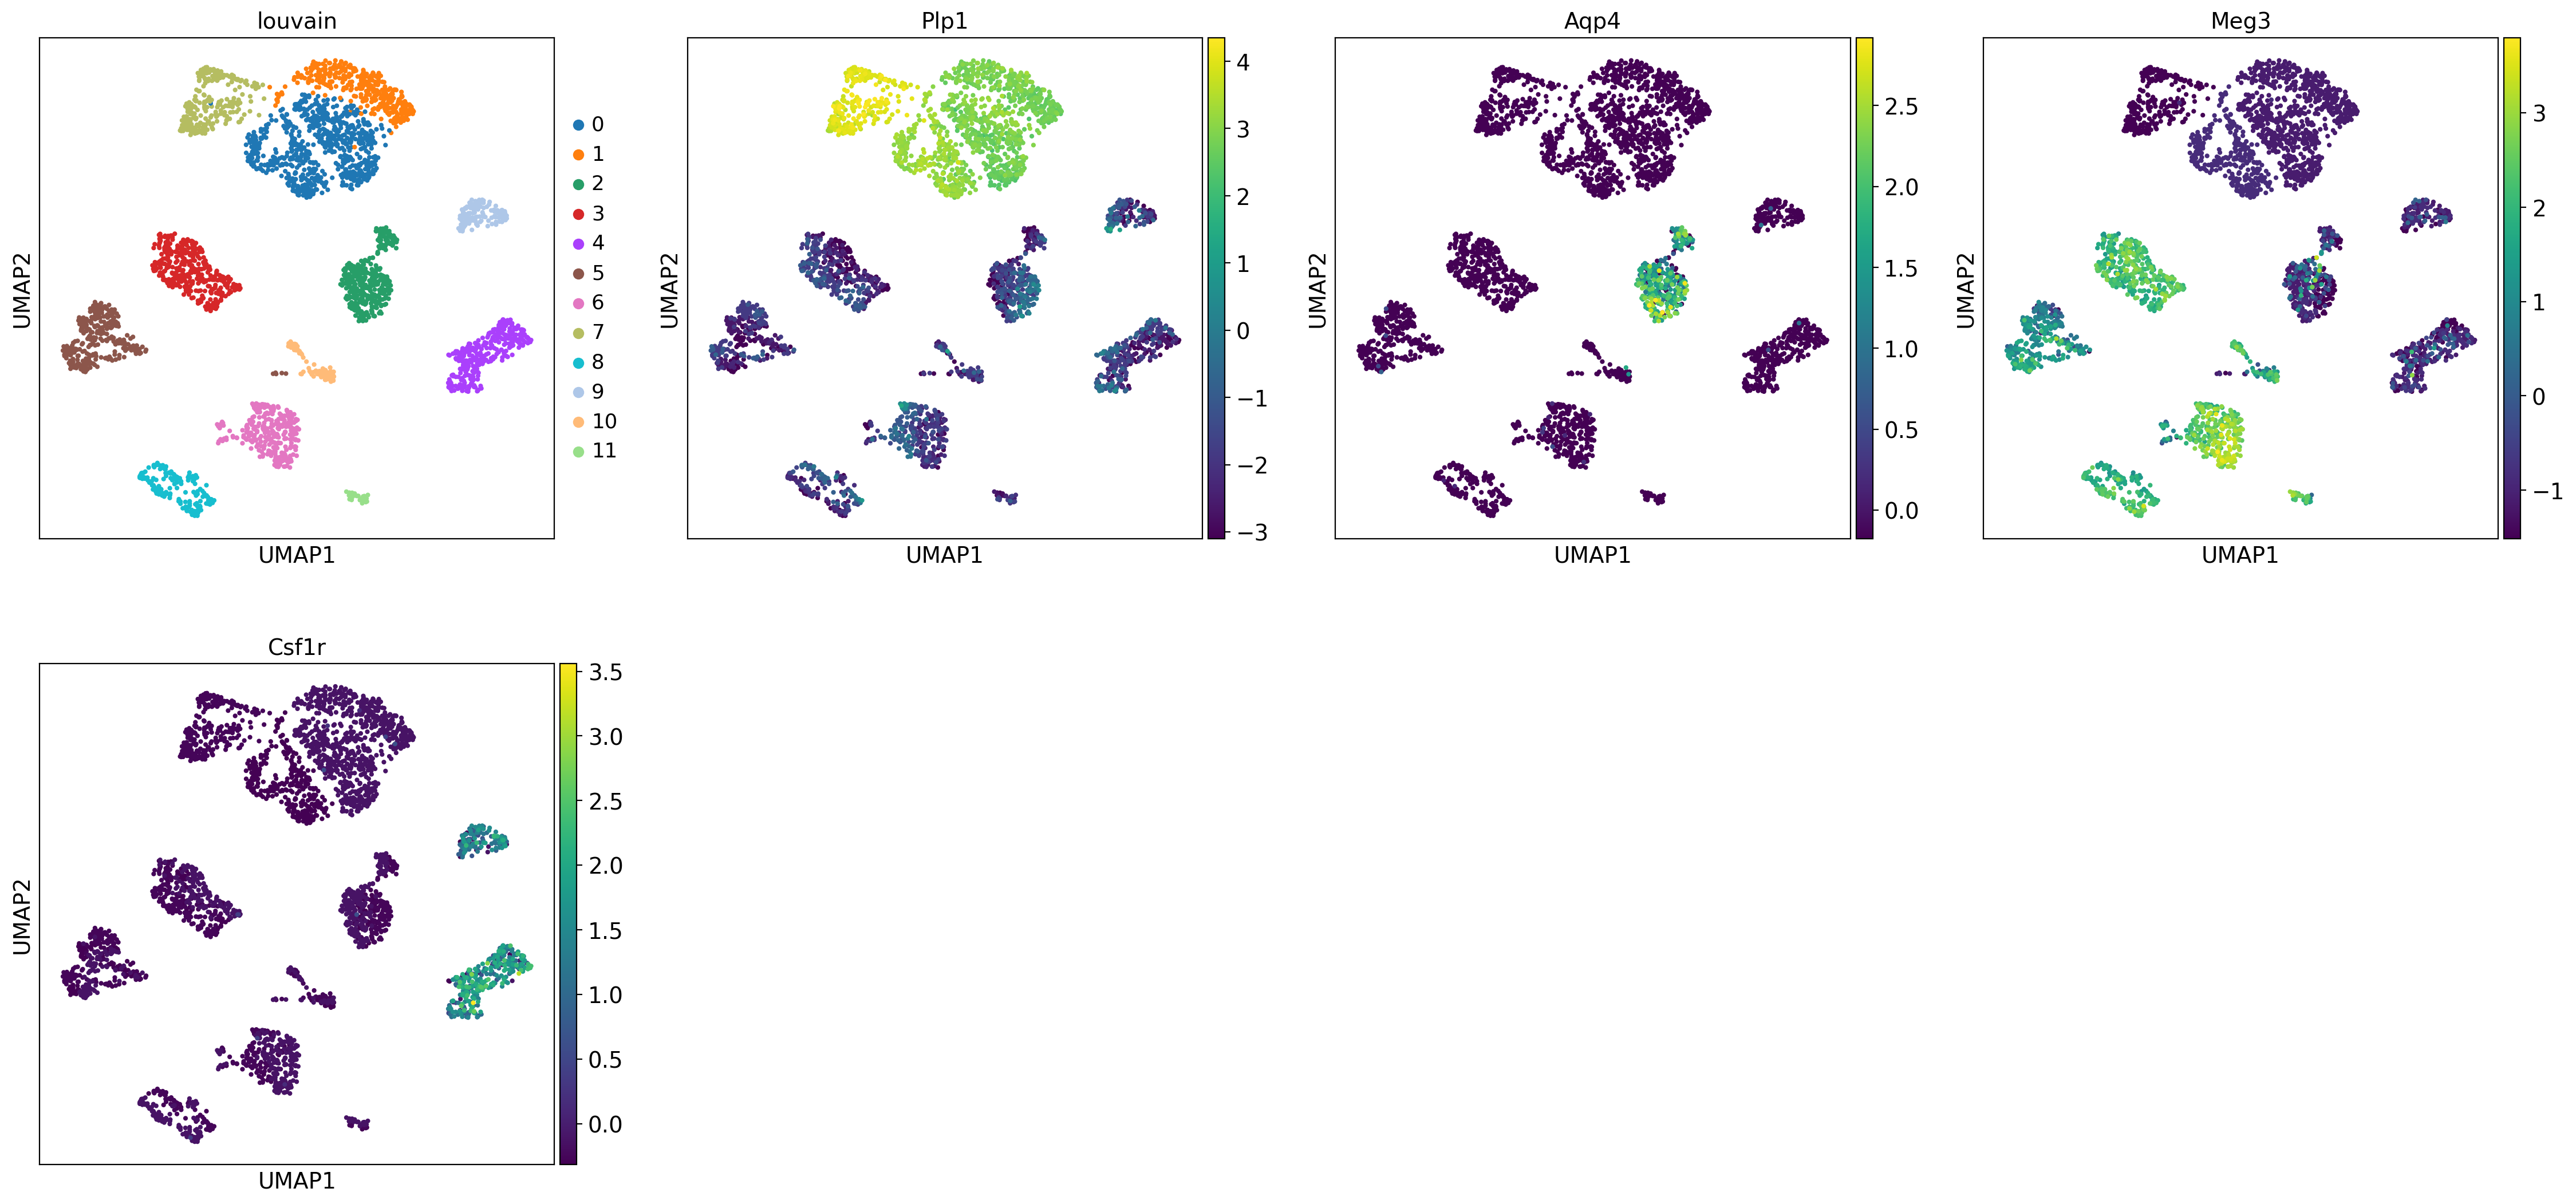

In [46]:
# your code here
sc.pl.umap(adata, color=['louvain','Plp1','Aqp4','Meg3','Csf1r'])

### **Exercise 7**:

Let’s take a few steps back to understand all of the previous steps a little bit better!

The number of genes selected by the highly_variable_genes function can significantly impact your ability to cluster. Too few genes and you cannot discriminate between different cell types, too many genes and you capture lots of noisy clusters!

Try repeating the previous analysis with either 500 or 5000 highly variable genes, naming the AnnData object differently (i.e. adata_500genes) to avoid overwriting your previous results.

Transfer the metadata for the new cluster labels to the original AnnData object's metadata at adata.obs and compare on the UMAP. Are the clusters different?

In [ ]:
# your code here


### **Exercise 8**:

Once you have settled on the parameters for the dimensionality reduction and clustering steps, it is time to begin annotating your clusters with cell types. This is normally a challenging step!

When you are not too familiar with the marker genes for a particular cluster, a good starting point is simply to Google a strong marker gene and understand its function. Other tools that might be useful include EnrichR and GSEAPy.
- https://maayanlab.cloud/Enrichr/
- https://gseapy.readthedocs.io/en/latest/gseapy_example.html#2.-Enrichr-Example

Fortunately in our case, this dataset comes from a publication with an extensive web browser that allows you to search for cell types by marker gene expression: http://mousebrain.org/adolescent/celltypes.html

This should help narrow down the search but might not be enough for distinguishing two very similar cell types or clusters.

Justify your cell type choices with marker genes from the literature!

### **Exercise 9**:

Create a new metadata attribute to annotate clusters with corresponding cell types. This can be done as shown below. Illustrate the final results on the UMAP or tSNE.

In [ ]:
cluster2type_dict = {"0":"CellType1", "1": "CellType2", ... } # update for the number of clusters/cell types you have!

adata.obs["cell_type"] = np.array([cluster2type_dict[i] for i in adata.obs["louvain"]])

In [ ]:
# your code here to visualize result on the tSNE

### **Exercise 10**:

There are many excellent plotting functions to visualize marker genes for particular cell types in your data. Explore the documentation below and create some visualizations of your results (such as a heatmap, dot plot, or violin plot).

https://scanpy-tutorials.readthedocs.io/en/latest/plotting/core.html


In [ ]:
sc.pl.heatmap(adata_raw_norm, ["Gene1", "Gene2", ..., "GeneN"], groupby='louvain',
              cmap='viridis', dendrogram=False)

In [ ]:
sc.pl.dotplot(adata_raw_norm, ["Gene1", "Gene2", ..., "GeneN"], groupby='louvain',
              cmap='viridis', dendrogram=False)

In [ ]:
sc.pl.violin(adata_raw_norm, ["Gene1", "Gene2", ..., "GeneN"], groupby='louvain',
              cmap='viridis', dendrogram=False)

## 8. Compare to the annotated results from the study

Fortunately, these data are from a completed study, so we have the annotations created by the authors for the various cell types! When you reach this step, let us know and we will provide you with the “solutions.” Load these into a new AnnData object, named ref_adata.

Once you have done this, visualize the cell types provided by the authors. Some good questions to think about investigating might be: Do the author's results overlap with the clusters and/or cell types you annotated? Did the authors overgeneralize or did you miss any clusters? How many of your cells were excluded by the authors?





### **Exercise 11**:

Compare your results with those from the published study. Some suggestions are below:

In [ ]:
ref_adata = sc.read_h5ad() # load reference file (only provided to your group once the prior steps are completed)

In [ ]:
# compare the number of cells in your AnnData object and the number of cells in the reference
ref_adata.n_obs, adata.n_obs

In [ ]:
ref_adata

In [ ]:
# transfer the labels from the reference data to your annotated data
# this can done by creating a dictionary of barcode : cell type for the reference
# then use that dictionary to create a new metadata attribute ("reference_cell_type") for your AnnData object

In [ ]:
sc.pl.umap(adata_raw_norm, color=["reference_cell_type"])

In [ ]:
# do your clusters / cell types correspond directly to cell types from the authors?
# do you have multiple clusters that the author's annotated together as a single cell type?
# or, do you have one cluster that the author's actually annotated as two different cell types?

In [ ]:
# what are the marker genes for the author's cell types? does this assist with annotation of your clusters?
sc.tl.rank_genes_groups # to complete
marker_genes = pd.DataFrame(adata_raw_norm.uns["rank_genes_groups"]["names"])

In [ ]:
marker_genes.head()

In [ ]:
# don't forget to save your final AnnData object